# EN3150 - Assignment 01
# Learning from data and related challenges and linear models for regression

## Linear Regression Impact on outliers

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Finding the Linear Regression model.  

Here we will be using Residual Sum of Squares(RSS) to calculate the error. 
So our Loss function will be,  
$$ J(w) = \sum \limits_{i=1}^{n} (y_{i}-\hat{y}_{i})^{2} $$

Here $ \hat{y} = Ax+B $.
After taking the derivative w.r.t. $A$ and $B$ we get the following equations.

$$\frac{\partial J}{\partial A} = 2 \sum \limits_{i=1}^{n} (\hat{y} - y) x $$
$$\frac{\partial J}{\partial B} = 2 \sum \limits_{i=1}^{n} (\hat{y} - y) $$

We will use the above result to change the parameters of the model to minimize the Lost function using iterative method.



In [11]:
A = B = 0       # Initially setting up parameters 
lr = 0.001
epochs = 1500

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.0 , -40.0, -8.13, -11.73, -16.08, -19.95, -24.03])
loss = []
param_A = [A,]
param_B = [B,]

for i in range(epochs):
    y_hat = A*x + B
    loss_i = np.sum(np.square(y_hat - y))
    dA= 2*np.sum((y_hat-y)*x)
    dB= 2*np.sum(y_hat-y)
    A-= lr*dA
    B-= lr*dB
    loss.append(loss_i)
    param_A.append(A)
    param_B.append(B)

x_model = np.linspace(0,9,100)
y_model = A*x_model+ B

### Plotting the model

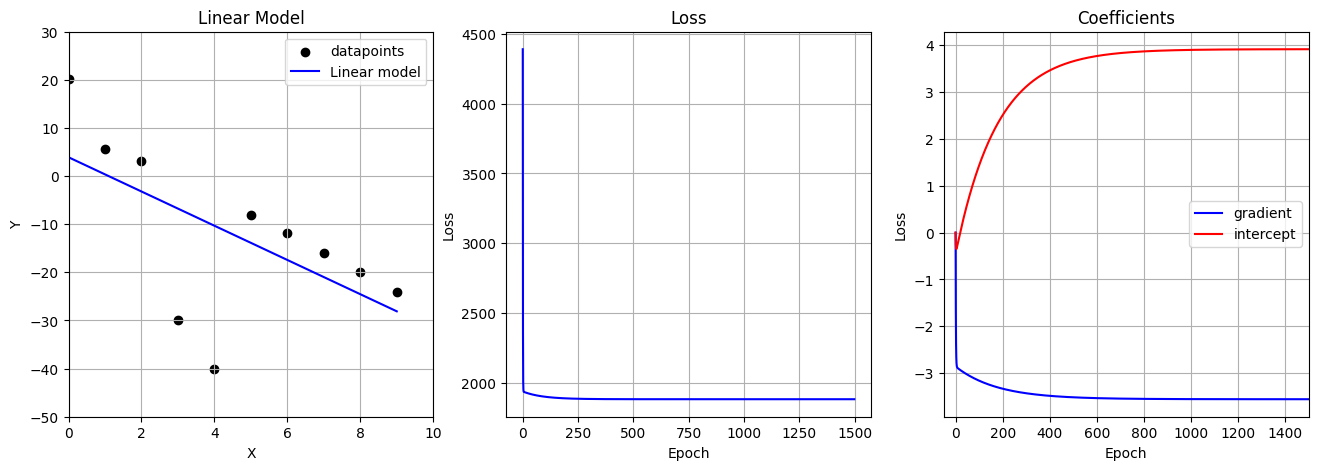

In [12]:
fig = plt.figure(figsize=(16,5))

plt.subplot(131)

plt.scatter(x,y, color='black', label='datapoints')
plt.plot(x_model,y_model, color='blue', label='Linear model' )
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-50,30))
plt.xlim((0,10))
plt.title("Linear Model")
plt.grid()

plt.subplot(132)

plt.plot(loss, color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

plt.subplot(133)

plt.plot(param_A, color='blue', label='gradient')
plt.plot(param_B, color='red' , label='intercept')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.xlim((-50,1500))
plt.ylabel('Loss')
plt.title('Coefficients')
plt.grid()

plt.show()

### Loss Calculation 

- Now let's consider the new loss function to reduce the effect of outliers.
$$ L(\theta , \beta) = \frac{1}{N} \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}_i)^{2}}{(y_i - \hat{y}_i)^2 + \beta^2} $$


In [13]:
def calc_loss(A,B,x,y,beta,N=10):
    y_hat = A*x + B

    error = y - y_hat
    denom = error**2 + beta**2

    loss = (1/N) * np.sum(error**2 / denom)

    return loss

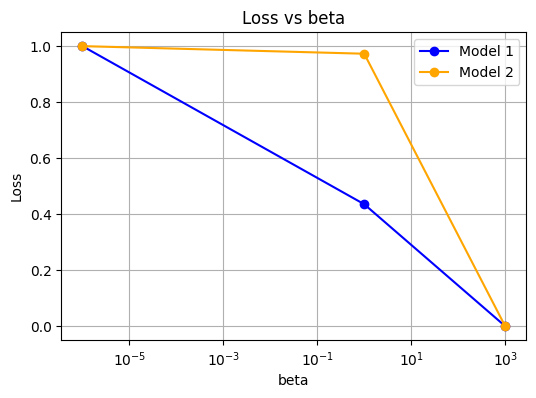

In [18]:
N = 10

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.0 , -40.0, -8.13, -11.73, -16.08, -19.95, -24.03])


# Loss for model 1
A1 = -4
B1 = 12 
M1_loss = [0, 0 ,0]

M1_loss[0] = calc_loss(A1,B1,x,y,0.000001,N)    #Loss for beta=10^-6
M1_loss[1] = calc_loss(A1,B1,x,y,1,N)           #Loss for beta=1
M1_loss[2] = calc_loss(A1,B1,x,y,1000,N)        #Loss for beta=1000


# Loss for model 2
A2 = -3.55
B2 = 3.91 
M2_loss = [0, 0 ,0]

M2_loss[0] = calc_loss(A2,B2,x,y,0.000001,N)    #Loss for beta=10^-6
M2_loss[1] = calc_loss(A2,B2,x,y,1,N)           #Loss for beta=1
M2_loss[2] = calc_loss(A2,B2,x,y,1000,N)        #Loss for beta=1000



beta_vals = [1e-6 , 1 , 1000]

fig = plt.figure(figsize=(6,4))
plt.plot(beta_vals, M1_loss, color='blue', label='Model 1', marker = 'o')
plt.plot(beta_vals, M2_loss, color='orange' , label='Model 2', marker = 'o')
plt.legend(loc='best')
plt.xlabel('beta')
plt.xscale('log')
plt.ylabel('Loss')
plt.title('Loss vs beta')
plt.grid()

For beta = 1 Model 1 Loss:  0.435416262490386  
For beta = 10^-6 Model 1 Loss:  0.9999999998258207  
For beta = 10^3 Model 1 Loss:  0.0002268287498440988  
For beta = 1 Model 2 Loss:  0.9728470518681676  
For beta = 10^-6 Model 2 Loss:  0.9999999999999718  
For beta = 10^3 Model 2 Loss:  0.00018824684654645654  

- **For very small values of $\beta$ ($\beta = 10^{-3}$) :**
>The loss values for both models are extremely close to 1 (e.g., 0.9999...). This happens because the denominator term, $(y_i​−\hat{y}_​i​)^2+β^2$, is dominated by the residual squared for almost every data point. The robust loss function essentially treats all points as large outliers and caps the loss for each point at a value of 1. As a result, the total loss becomes approximately 1, regardless of the model's performance. This value of β makes the loss function insensitive to changes in the model, making it useless for optimization.  

- **For very large values of $\beta$ ($\beta = 10^6$) :**  
>With a large $\beta$, the denominator term is dominated by $\beta^2$. The loss function for each data point simplifies to approximately $\frac{(y_i​−\hat{y}_​i​)^2}{\beta^2}​$, which is just a scaled version of the standard squared error. In this scenario, the robust nature of the loss function is lost. Outliers with large residuals will still have a large, dominant influence on the total loss, which is precisely what the robust estimator is designed to prevent.

- **For balanced value of $\beta$ ($\beta = 1$) :**
>This intermediate value allows the loss function to function as intended. For inliers (points with small residuals), the loss function behaves like a squared error, rewarding a good fit. For outliers (points with large residuals), the loss is capped at a value close to 1, preventing them from skewing the model.

The most suitable value is $\beta=1$. When comparing the loss of *model 1* and *model 2* we can see significant difference when $\beta=1$. Which indicates one model had been siginificantly affected by outliers.

### Selecting the most suitable model

- Partial Derivatives of the loss function w.r.t. out model parameters $A$ and $B$ are as follows,
$$  \frac{\partial L}{\partial A} = \frac{2\beta^2}{N} \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}) x}{((y_i - \hat{y}_i)^2 + \beta^2)^2} $$
$$  \frac{\partial L}{\partial B} = \frac{2\beta^2}{N}  \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}) }{((y_i - \hat{y}_i)^2 + \beta^2)^2} $$

- We will use the above functions to calculate the gradient and tune our parameters.

In [19]:
# Setting parameters with the values between both models
A = -3.55
B = 3.91    

lr = 0.005

epochs = 50000
beta=1

loss = []
param_A = [A,]
param_B = [B,]

for i in range(epochs):
    y_hat = A*x + B

    error = y - y_hat
    denom = error**2 + beta**2

    loss_i = (1/N) * np.sum(error**2 / denom)

    dA= (-1/N)*np.sum(2*(beta**2)*error*x/(denom**2))
    dB= (-1/N)*np.sum(2*(beta**2)*error/(denom**2))
    
    A-= lr*dA
    B-= lr*dB
    
    loss.append(loss_i)
    param_A.append(A)
    param_B.append(B)

x_model = np.linspace(0,9,100)
y_model = A*x_model+ B

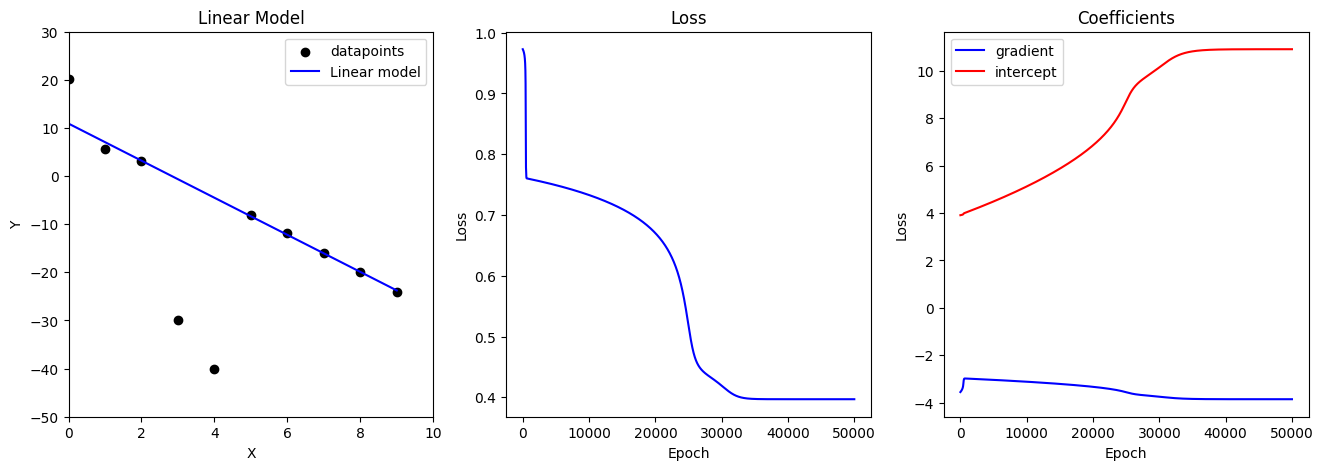

In [37]:
fig = plt.figure(figsize=(16,5))

plt.subplot(131)

plt.scatter(x,y, color='black', label='datapoints')
plt.plot(x_model,y_model, color='blue', label='Linear model' )
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-50,30))
plt.xlim((0,10))
plt.title("Linear Model")

plt.subplot(132)

plt.plot(loss, color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(133)

plt.plot(param_A, color='blue', label='gradient')
plt.plot(param_B, color='red' , label='intercept')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Coefficients')

plt.show()

Here we can see parameters are closer to the parameters of model 1. Therefore model 1 is more suitable. 

### Mechanism of the robust estimator.  

The robust estimator mitigates the influence of outliers by imposing an upper bound on the loss contributed by any single data point. The behavior of the loss function, defined for a single point as $L_i​=\frac{r_i^2​}{r_i^2​+β^2}$ where $r_i$​ is the residual, is determined by the magnitude of the residual relative to the hyperparameter $β$.

For inliers, where the residual is small compared to $β (r_i​≪β)$, the loss function approximates a scaled quadratic error, $L_i​≈ \frac{r_i^2}{β^2}$. In this regime, its behavior is analogous to the standard Mean Squared Error (MSE) objective, thereby fitting the model closely to these points.

Conversely, for outliers, where the residual is large $(r_i​≫β)$, the loss function saturates and approaches a constant value of 1. Unlike MSE, where an outlier's contribution to the loss can grow without bound, this property ensures that the influence of outliers is effectively capped.

This saturation prevents the model parameters from being disproportionately skewed by a few extreme values, resulting in a regression that is more robust and representative of the underlying structure of the inlier data.

### Alternative Loss Functions  

Alternative robust loss function is the Huber Loss.  

It treats errors differently based on their magnitude. It defines a threshold hyperparameter, delta (δ).  

- For small errors (inliers), it uses the squared error.
- For large errors (outliers), it switches to the absolute error.

This creates a piecewise function defined as:
$$
L_{\delta}(r) =
\begin{cases}
  \frac{1}{2}r^2 & \text{for } |r| \le \delta \\
  \delta\left(|r| - \frac{1}{2}\delta\right) & \text{for } |r| > \delta
\end{cases}
$$

Where:
- r is the residual $(y−\hat{y}​$).
- δ is the threshold.

## Loss Function

### Calculating the loss

In [20]:
def calc_MSE(y, y_hat):
    N= len(y)

    MSE = (np.square(y - y_hat)) / N

    return MSE

def calc_BCE(y, y_hat):
    N = len(y)
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15) #Avoid Zero Division Warnings

    BCE = (-1/N) * (y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

    return BCE

In [21]:
y_true = np.ones((13,))
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

MSE = calc_MSE(y_true, y_pred)
BCE = calc_BCE(y_true, y_pred)

+----------+----------+-------------+-------------+
|   y_true |   y_pred |         MSE |         BCE |
+==========+==========+=============+=============+
|        1 |    0.005 | 0.0761558   | 0.407563    |
+----------+----------+-------------+-------------+
|        1 |    0.01  | 0.0753923   | 0.354244    |
+----------+----------+-------------+-------------+
|        1 |    0.05  | 0.0694231   | 0.230441    |
+----------+----------+-------------+-------------+
|        1 |    0.1   | 0.0623077   | 0.177122    |
+----------+----------+-------------+-------------+
|        1 |    0.2   | 0.0492308   | 0.123803    |
+----------+----------+-------------+-------------+
|        1 |    0.3   | 0.0376923   | 0.0926133   |
+----------+----------+-------------+-------------+
|        1 |    0.4   | 0.0276923   | 0.0704839   |
+----------+----------+-------------+-------------+
|        1 |    0.5   | 0.0192308   | 0.053319    |
+----------+----------+-------------+-------------+
|        1 |

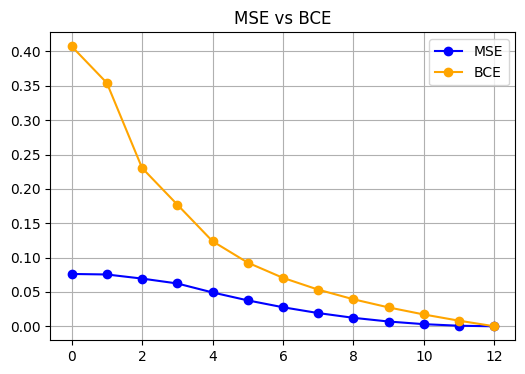

In [24]:
from tabulate import tabulate

# Create a DataFrame to display the values
data = {
    "y_true": list(y_true),
    "y_pred": list(y_pred),
    "MSE": list(MSE),
    "BCE": list(BCE)
}

# Convert to tabulate format
table = tabulate(data, headers="keys", tablefmt="grid")

# Print the table
print(table)

print("\n\nMSE :",np.sum(MSE))
print("BCE :",np.sum(BCE))

fig = plt.figure(figsize=(6,4))

plt.plot(MSE, label='MSE', color='blue', marker = 'o')
plt.plot(BCE, label='BCE', color='orange', marker = 'o')
plt.legend(loc = 'best')
plt.title("MSE vs BCE")
plt.grid()
plt.show()



### Selection of Loss Function

- For the Application 01 where the output is a continous variable Linear regression is used. We need to estimate a line which moves closer to our datapoints. Therefore the Mean Squared error is suitable. In MSE when prediction deviates heavily, due to squaring the error Loss function return larger values leading to faster convergance.  

- In Binary classification model output is a probaility. BCE measures the difference of model output probability and actual binary label. With the logarithmic penalization of BCE, the incorrect predictions with high confidence are heavily penalized. Also BCE provides gradients that are well-suited for optimizing models that output probabilities, such as logistic regression. Therefore BCE is suitable as the loss function for the Application 02.

## Data Pre-Processing

### Generating the Features  
Provided code is used to generate features

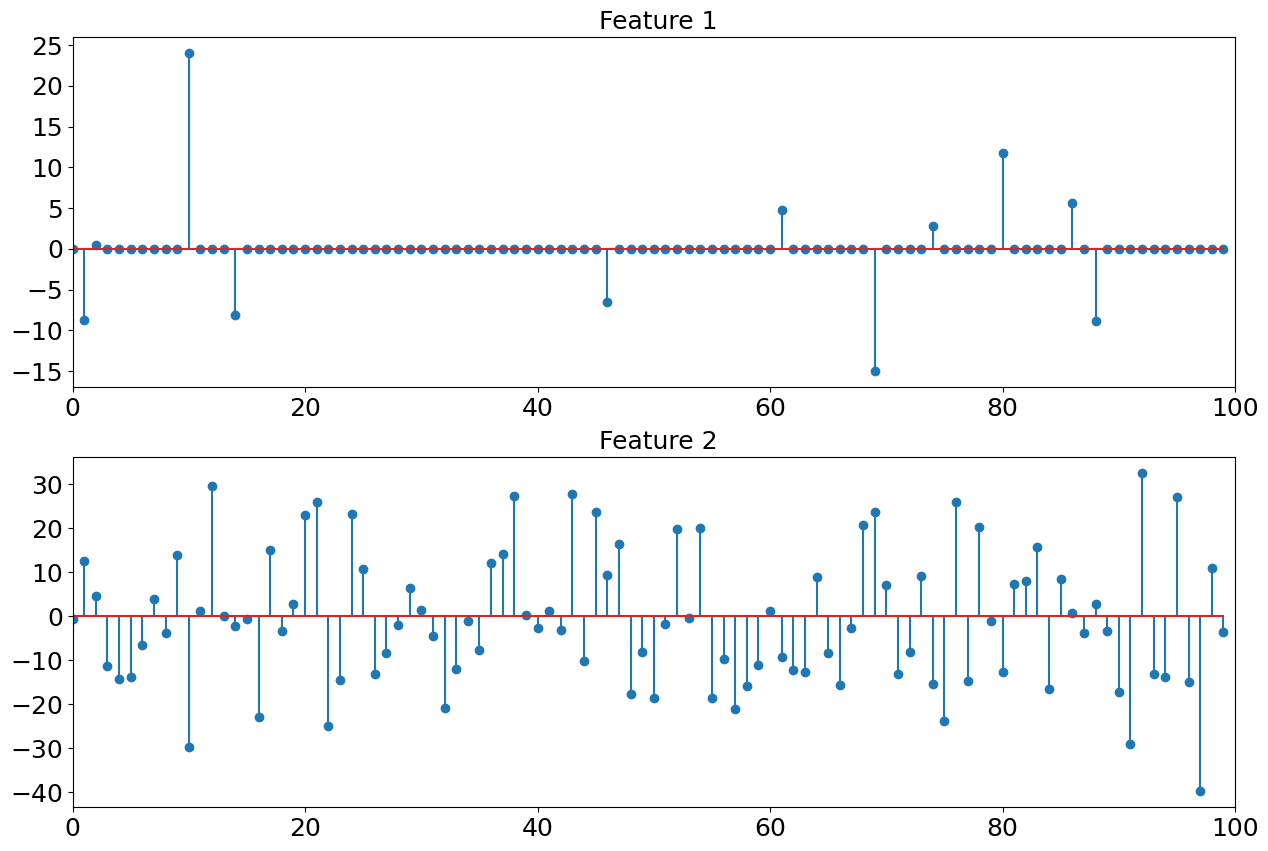

In [25]:
import numpy as np
import matplotlib . pyplot as plt

def generate_signal ( signal_length , num_nonzero ):
    signal = np. zeros ( signal_length )
    nonzero_indices = np. random . choice ( signal_length , num_nonzero ,
    replace = False )
    nonzero_values = 10* np. random . randn ( num_nonzero )
    signal [ nonzero_indices ] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non - zero elements in thesignal
your_index_no = 220067 
sparse_signal = generate_signal ( signal_length , num_nonzero )
sparse_signal [10] = ( your_index_no % 10) *2 + 10
if your_index_no % 10 == 0:
    sparse_signal [10] = np. random . randn (1) + 30
    sparse_signal = sparse_signal /5

epsilon = np. random . normal (0, 15, signal_length )

# epsilon = epsilon [:, np. newaxis ]
plt. figure ( figsize =(15 ,10) )
plt. subplot (2, 1, 1)
plt. xlim (0, signal_length )
plt. title (" Feature 1", fontsize =18)
plt. xticks ( fontsize =18) # Adjust x- axis tick label font size
plt. yticks ( fontsize =18)
plt. stem ( sparse_signal )
plt. subplot (2, 1, 2)
plt. xlim (0, signal_length )
plt. title (" Feature 2", fontsize =18)
plt. stem ( epsilon )
plt. xticks ( fontsize =18) # Adjust x- axis tick label font size
plt. yticks ( fontsize =18)
plt. show ()

### Scaling the features  

We will use standard scaling,  min-max scaling, and max-abs scaling from sklearn.

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

standard = StandardScaler()
min_max = MinMaxScaler()
max_abs = MaxAbsScaler()

- **Standard Scaling:** Transforms data to have a mean of 0 and a standard deviation of 1. It achieves this by subtracting the mean from each data point (centering) and then dividing by the standard deviation.

- **Min-Max Scaling:** Rescales the data to a fixed range, typically [0, 1]. It works by shifting and rescaling the values based on the minimum and maximum values present in the feature.

- **Max-Abs Scaling:** Divides every data point by the maximum absolute value in the feature set. This scales the data to the range [-1, 1] and is a non-centering method.

#### Scaling the feature 1(Sparse Signal)

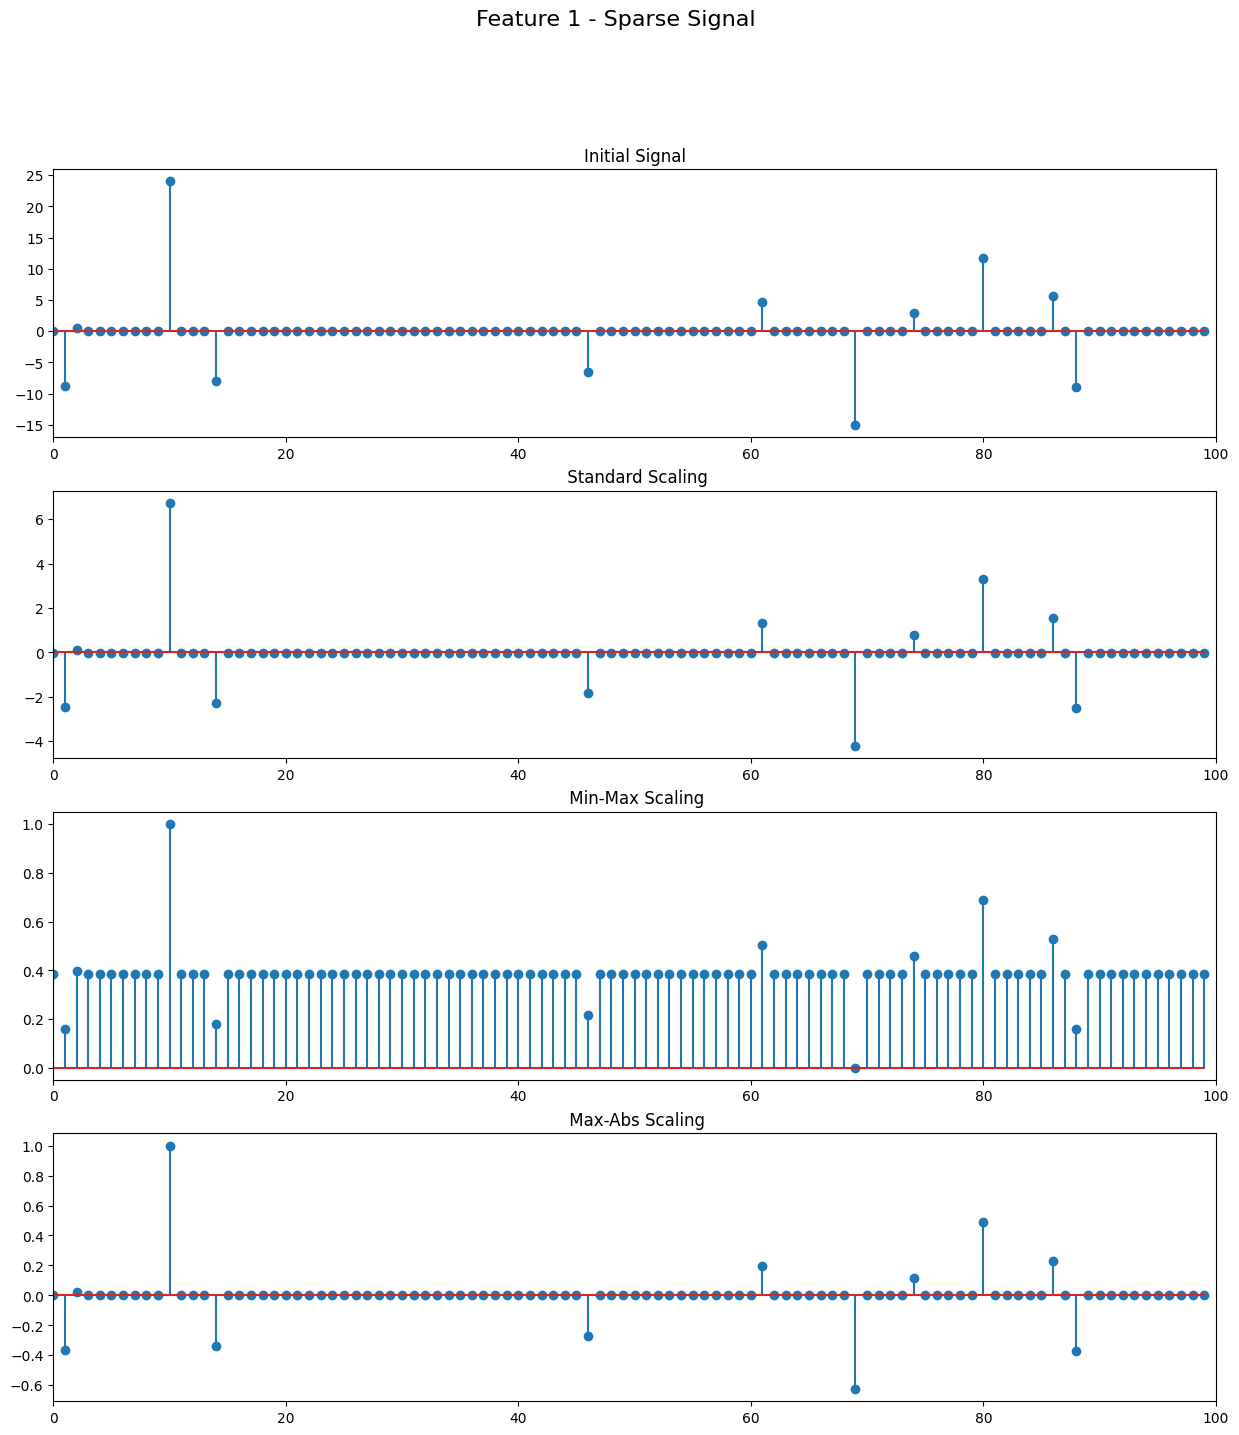

In [41]:
standard_feature1 = standard.fit_transform(sparse_signal.reshape(-1,1)).flatten()
minmax_feature1 = min_max.fit_transform(sparse_signal.reshape(-1,1)).flatten()
maxabs_feature1 = max_abs.fit_transform(sparse_signal.reshape(-1,1)).flatten()


plt. figure ( figsize =(15 ,16) )

plt.suptitle('Feature 1 - Sparse Signal', fontsize = 16)

plt. subplot (411)
plt. xlim (0, signal_length )
plt. title ("Initial Signal", fontsize =12)
plt. stem ( sparse_signal )

plt. subplot (412)
plt. xlim (0, signal_length )
plt. title (" Standard Scaling", fontsize =12)
plt. stem ( standard_feature1 )

plt. subplot (413)
plt. xlim (0, signal_length )
plt. title (" Min-Max Scaling", fontsize =12)
plt. stem ( minmax_feature1 )

plt. subplot (414)
plt. xlim (0, signal_length )
plt. title (" Max-Abs Scaling", fontsize =12)
plt. stem ( maxabs_feature1 )


plt. show ()

For the sparse signal, *Max-Abs Scaling* is the most suitable method.

**Justification:** The primary characteristic of this feature is its sparsity—a large proportion of its values are exactly zero. Preserving this structure is critical. Max-Abs Scaling is the only method presented that guarantees the preservation of zeros, as the operation $(0/max(∣xi​∣)=0)$ does not alter them. It successfully scales the non-zero values while maintaining the integrity of the feature's sparse nature. In contrast, both Standard Scaling and Min-Max Scaling involve shifting the data, which converts the original zero entries into non-zero values, thereby destroying the feature's fundamental sparse structure.

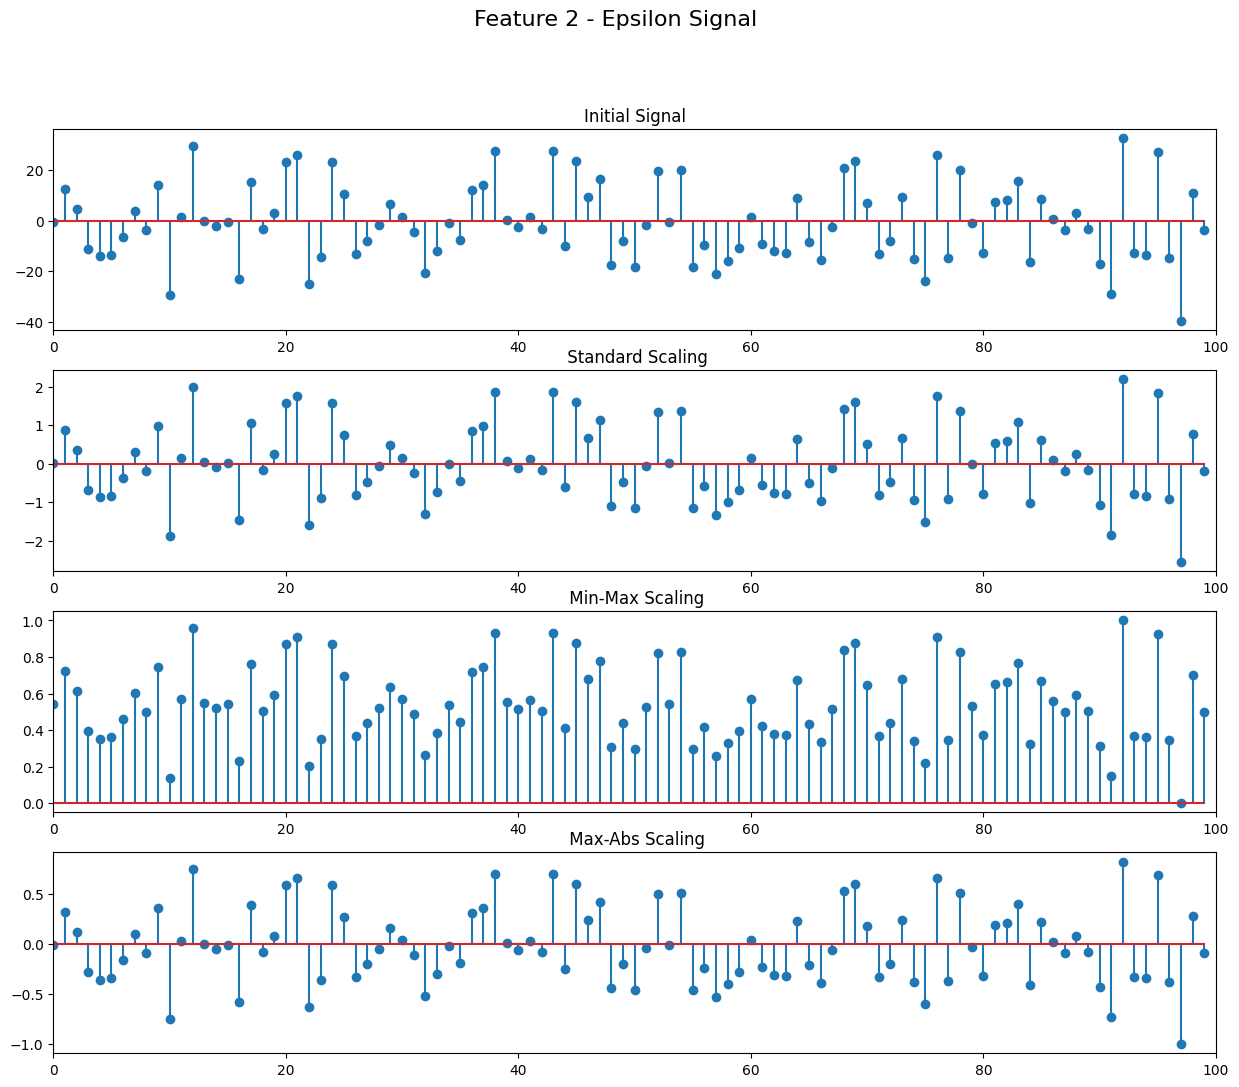

In [40]:
standard_feature2 = standard.fit_transform(epsilon.reshape(-1,1)).flatten()
minmax_feature2 = min_max.fit_transform(epsilon.reshape(-1,1)).flatten()
maxabs_feature2 = max_abs.fit_transform(epsilon.reshape(-1,1)).flatten()


plt. figure ( figsize =(15 ,12) )

plt.suptitle('Feature 2 - Epsilon Signal', fontsize = 16)

plt. subplot (411)
plt. xlim (0, signal_length )
plt. title ("Initial Signal", fontsize =12)
plt. stem ( epsilon )

plt. subplot (412)
plt. xlim (0, signal_length )
plt. title (" Standard Scaling", fontsize =12)
plt. stem ( standard_feature2 )

plt. subplot (413)
plt. xlim (0, signal_length )
plt. title (" Min-Max Scaling", fontsize =12)
plt. stem ( minmax_feature2 )

plt. subplot (414)
plt. xlim (0, signal_length )
plt. title (" Max-Abs Scaling", fontsize =12)
plt. stem ( maxabs_feature2 )


plt. show ()

For the dense, epsilon-like signal, *Standard Scaling* is the most suitable method.

**Justification:** This feature is dense and appears to be symmetrically distributed around a mean of zero, which is characteristic of statistical noise. The key property to preserve is this distributional shape. Standard Scaling is ideal for this task because it standardizes the feature to have a mean of 0 and a unit variance. While Min-Max Scaling normalizes the range, it undesirably shifts the data away from its natural zero center. Max-Abs Scaling, though it preserves the center, is less statistically robust for dense data as it relies on a single extreme value for scaling rather than the overall distribution's standard deviation.